C:\Users\yogevpeled\AppData\Local\Temp\ipykernel_13056\1264618826.py:14: DtypeWarning: Columns (68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ASA All NBA Raw Data.csv")


First rows:
        game_id   game_date  OT H_A Team_Abbrev  Team_Score  Team_pace  \
0  202202270CHO  2022-02-27   1   A         DET         127       96.3   
1  202202270CHO  2022-02-27   1   A         DET         127       96.3   
2  202202270CHO  2022-02-27   1   A         DET         127       96.3   
3  202202270CHO  2022-02-27   1   A         DET         127       96.3   
4  202202270CHO  2022-02-27   1   A         DET         127       96.3   

   Team_efg_pct  Team_tov_pct  Team_orb_pct  ...  pf_per_minute     ts  \
0         0.518          10.6          39.3  ...       0.051858  19.32   
1         0.518          10.6          39.3  ...       0.120060  19.00   
2         0.518          10.6          39.3  ...       0.122324  18.64   
3         0.518          10.6          39.3  ...       0.173410   9.88   
4         0.518          10.6          39.3  ...       0.090293   4.88   

  last_60_minutes_per_game_starting last_60_minutes_per_game_bench   PG%  \
0                     

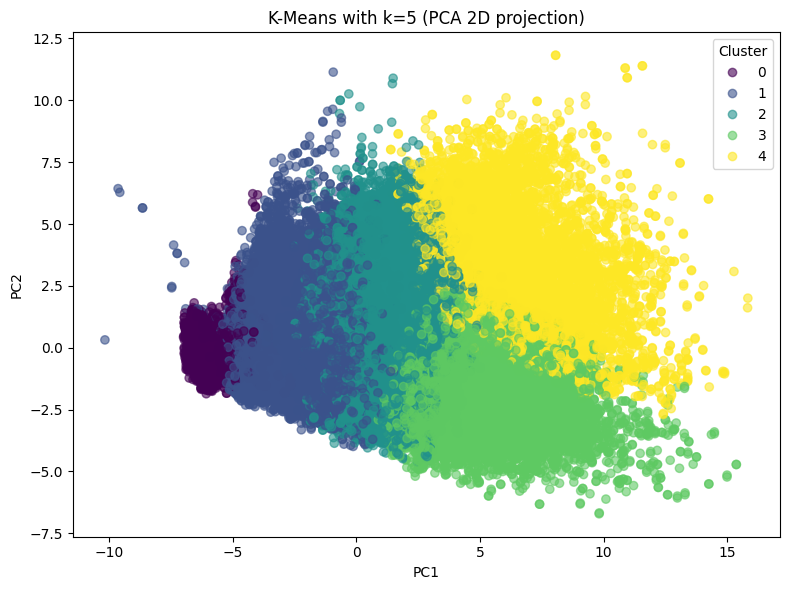

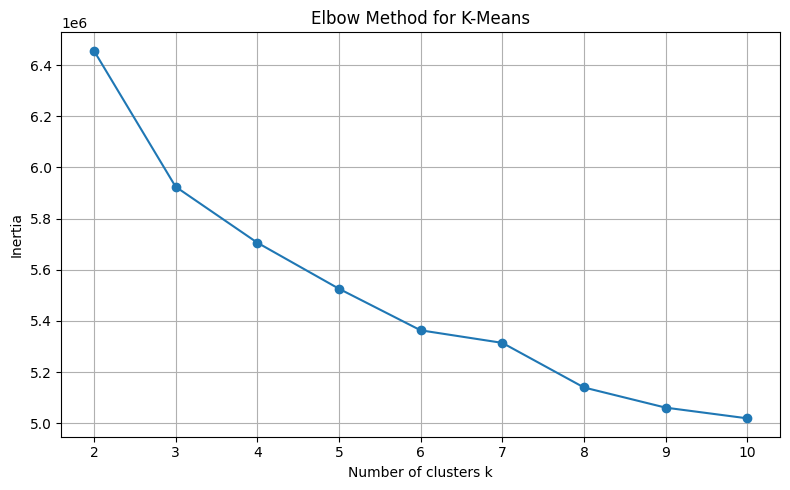


Inertias by k:
k = 2: inertia = 6456570.78
k = 3: inertia = 5924751.73
k = 4: inertia = 5706045.01
k = 5: inertia = 5525908.60
k = 6: inertia = 5363403.12
k = 7: inertia = 5314271.31
k = 8: inertia = 5139880.71
k = 9: inertia = 5061067.82
k = 10: inertia = 5019217.67


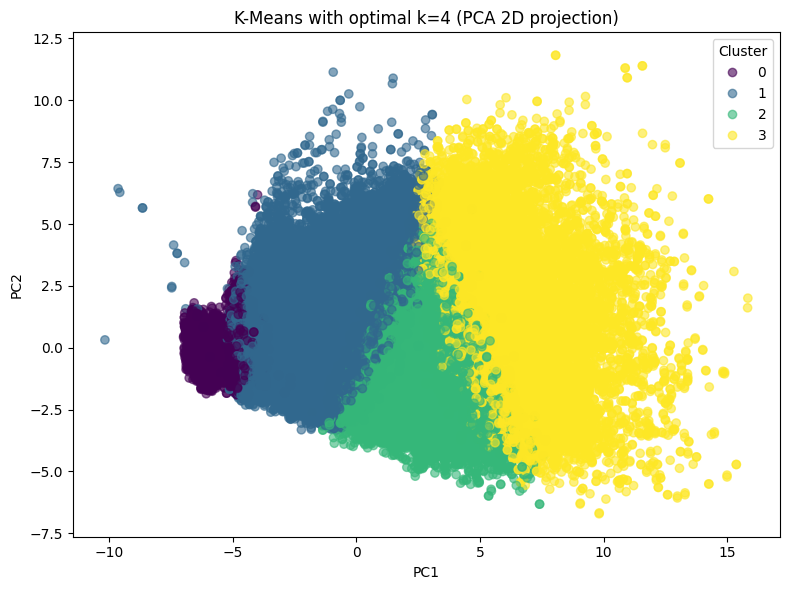


Cluster profiles (mean of standardized features):
               OT  Team_Score  Team_pace  Team_efg_pct  Team_tov_pct  \
cluster                                                                
0        0.058589   -0.006025  -0.101971      0.005652     -0.043064   
1       -0.049232   -0.186619   0.009452     -0.178706      0.049925   
2       -0.030211    0.127711   0.024587      0.160196     -0.014730   
3        0.097123    0.153237   0.064347      0.048818     -0.022250   

         Team_orb_pct  Team_ft_rate  Team_off_rtg  Opponent_Score  \
cluster                                                             
0           -0.003888      0.016922      0.027860        0.002277   
1           -0.022316     -0.022818     -0.194809        0.015233   
2           -0.022998     -0.044437      0.135371       -0.014317   
3            0.105787      0.125098      0.108894       -0.006486   

         Opponent_pace  ...  pf_per_minute        ts  \
cluster                 ...                  

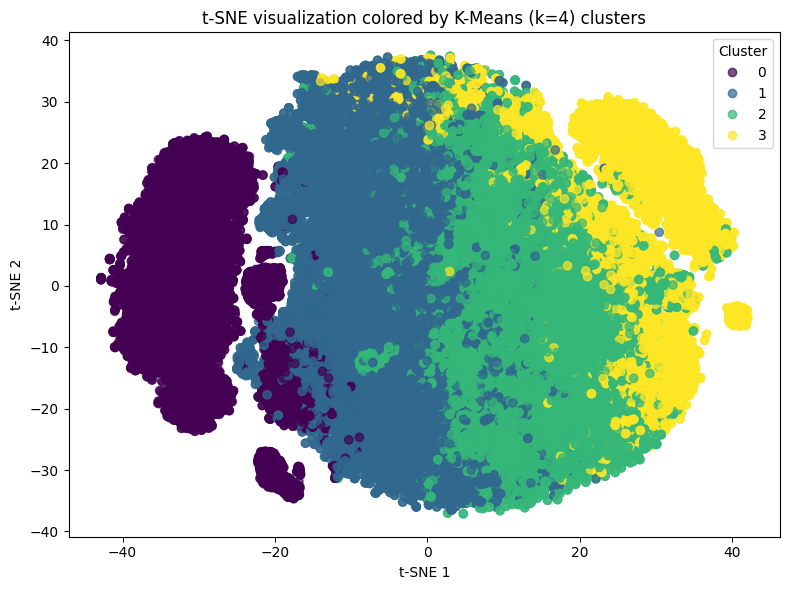

In [1]:
# ============================================
# 1. Imports & Data Loading
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Load data
df = pd.read_csv("ASA All NBA Raw Data.csv")

print("First rows:")
print(df.head())
print("\nInfo:")
print(df.info())

# ============================================
# 2. Preprocessing: choose numeric features
# ============================================
# Drop obvious non-numeric identifiers (edit this list if needed)
id_cols = ["Player", "Player_Name", "Name", "Team", "Date", "Game_ID"]
id_cols = [c for c in id_cols if c in df.columns]

# Keep only numeric columns
numeric_df = df.drop(columns=id_cols, errors="ignore").select_dtypes(include=[np.number])

# Handle missing values – simple strategy: fill with column mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(numeric_df)

# ============================================
# 3. K-Means with k=5 + 2D plot
# ============================================
k_fixed = 5
kmeans_5 = KMeans(n_clusters=k_fixed, random_state=42, n_init="auto")
clusters_5 = kmeans_5.fit_predict(X)

df["cluster_5"] = clusters_5  # attach cluster labels to original df

# Use PCA(2) only for visualization of clusters
pca_2 = PCA(n_components=2, random_state=42)
X_pca_2 = pca_2.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters_5, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means with k=5 (PCA 2D projection)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# ============================================
# 4. Inertia & Optimal Number of Clusters (Elbow)
# ============================================
inertias = []
k_values = range(2, 11)  # k=2..10, you can change if you want

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nInertias by k:")
for k, inertia in zip(k_values, inertias):
    print(f"k = {k}: inertia = {inertia:.2f}")

# ----> HERE: look at the elbow plot and choose k_opt manually.
# For example: k_opt = 4  or 5, depending on the “elbow”.

k_opt = 4  # <-- CHANGE THIS to the k you choose after seeing the elbow

# ============================================
# 5. K-Means with optimal k + characterization
# ============================================
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
clusters_opt = kmeans_opt.fit_predict(X)

df["cluster_opt"] = clusters_opt

# Plot updated clusters using PCA 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters_opt, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-Means with optimal k={k_opt} (PCA 2D projection)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# Characterize each cluster by feature means
cluster_profile = (
    pd.DataFrame(X, columns=numeric_df.columns)
    .assign(cluster=clusters_opt)
    .groupby("cluster")
    .mean()
)

print("\nCluster profiles (mean of standardized features):")
print(cluster_profile)

# Optionally also see mean in original scale:
cluster_profile_orig = (
    numeric_df.assign(cluster=clusters_opt)
    .groupby("cluster")
    .mean()
)
print("\nCluster profiles in ORIGINAL feature scale:")
print(cluster_profile_orig)

# ============================================
# 6. PCA Analysis
# ============================================

# (a) PCA with 3 components
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X)

expl_var_ratio_3 = pca_3.explained_variance_ratio_
total_var_3 = expl_var_ratio_3.sum()

print("\nPCA with 3 components:")
print("Explained variance ratio:", expl_var_ratio_3)
print(f"Total variance explained by 3 components: {total_var_3:.4f}")

first_number_3 = expl_var_ratio_3[0]
print(f"First number in explained variance ratio (PC1): {first_number_3:.4f}")

# (b) PCA with n_components=0.95 (let PCA pick number of components)
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(X)

expl_var_ratio_95 = pca_95.explained_variance_ratio_
total_var_95 = expl_var_ratio_95.sum()
n_comps_95 = pca_95.n_components_

print("\nPCA with 95% variance target:")
print("Number of components chosen:", n_comps_95)
print("Explained variance ratio of each component:", expl_var_ratio_95)
print(f"Total variance explained: {total_var_95:.4f}")

# Which component has highest explained variance (usually PC1)
max_comp_index = expl_var_ratio_95.argmax()
print(f"Component with highest explained variance (0-based index): {max_comp_index}")

# ============================================
# 7. Non-linear Dimensionality Reduction (t-SNE) for visualization
# ============================================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_opt, alpha=0.7)
plt.title(f"t-SNE visualization colored by K-Means (k={k_opt}) clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# (a) PCA with 3 components
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X)

expl_var_ratio_3 = pca_3.explained_variance_ratio_
total_var_3 = expl_var_ratio_3.sum()

print("\nPCA with 3 components:")
print("Explained variance ratio:", expl_var_ratio_3)
print(f"Total variance explained by 3 components: {total_var_3:.4f}")

first_number_3 = expl_var_ratio_3[0]
print(f"First number in explained variance ratio (PC1): {first_number_3:.4f}")

# (b) PCA with n_components=0.95 (let PCA pick number of components)
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(X)

expl_var_ratio_95 = pca_95.explained_variance_ratio_
total_var_95 = expl_var_ratio_95.sum()
n_comps_95 = pca_95.n_components_

print("\nPCA with 95% variance target:")
print("Number of components chosen:", n_comps_95)
print("Explained variance ratio of each component:", expl_var_ratio_95)
print(f"Total variance explained: {total_var_95:.4f}")

# Which component has highest explained variance (usually PC1)
max_comp_index = expl_var_ratio_95.argmax()
print(f"Component with highest explained variance (0-based index): {max_comp_index}")